In [1]:
%run Formular.ipynb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([   [5, 5, 2, 0, 1, 'nan', 'nan'],
        [4, 'nan', 'nan', 0, 'nan', 2, 'nan'],
        ['nan', 4, 1, 'nan', 'nan', 1, 1],
        [2, 2, 3, 4, 4, 'nan', 4],
        [2, 0, 4, 'nan', 'nan', 'nan', 5] ])
print(X)

[['5' '5' '2' '0' '1' 'nan' 'nan']
 ['4' 'nan' 'nan' '0' 'nan' '2' 'nan']
 ['nan' '4' '1' 'nan' 'nan' '1' '1']
 ['2' '2' '3' '4' '4' 'nan' '4']
 ['2' '0' '4' 'nan' 'nan' 'nan' '5']]


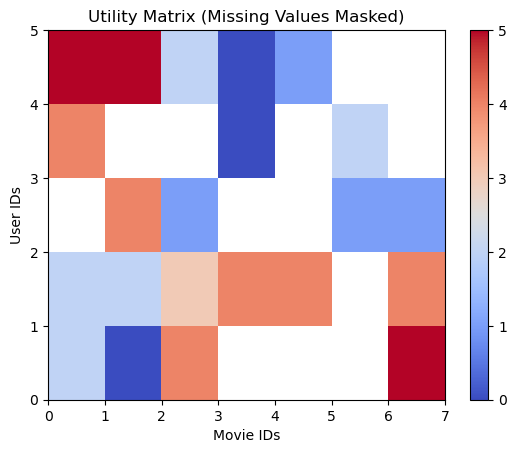

In [36]:
visualized_array = X.astype(float)

plt.imshow(visualized_array, cmap='coolwarm', aspect='auto', extent=[0, visualized_array.shape[1], 0, visualized_array.shape[0]], vmin=0, vmax=5)

plt.xlabel('Movie IDs')
plt.ylabel('User IDs')
plt.title('Utility Matrix (Missing Values Masked)')

plt.colorbar()
plt.show()

In [4]:
Rated = np.zeros((len(X), len(X[0])), dtype=float)

for i in range(len(X)):
    for j in range(len(X[i])):
        Rated[i, j] = 1 if X[i][j] != 'nan' else 0

print(Rated)

[[1. 1. 1. 1. 1. 0. 0.]
 [1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 1.]
 [1. 1. 1. 1. 1. 0. 1.]
 [1. 1. 1. 0. 0. 0. 1.]]


In [5]:
def sum_column_excluding_nan(column):
    column = np.array(column, dtype=float)
    return np.nansum(column)

X_column_sums = np.apply_along_axis(sum_column_excluding_nan, 0, X)
print(X_column_sums)
Rated_column_sums = np.apply_along_axis(sum_column_excluding_nan, 0, Rated)
print(Rated_column_sums)

[13. 11. 10.  4.  5.  3. 10.]
[4. 4. 4. 3. 2. 2. 3.]


In [6]:
theta = X_column_sums / Rated_column_sums
print(theta)

[3.25       2.75       2.5        1.33333333 2.5        1.5
 3.33333333]


In [7]:
X_norm = np.zeros((len(X), len(X[0])), dtype=float)

for i in range(len(X)):
    for j in range(len(X[i])):
        X_norm[i, j] = float(X[i,j]) - theta[j] if X[i][j] != 'nan' else 0

print(X_norm)

[[ 1.75        2.25       -0.5        -1.33333333 -1.5         0.
   0.        ]
 [ 0.75        0.          0.         -1.33333333  0.          0.5
   0.        ]
 [ 0.          1.25       -1.5         0.          0.         -0.5
  -2.33333333]
 [-1.25       -0.75        0.5         2.66666667  1.5         0.
   0.66666667]
 [-1.25       -2.75        1.5         0.          0.          0.
   1.66666667]]


In [8]:
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / ( np.linalg.norm(vector1) * np.linalg.norm(vector2) )

In [9]:
X_norm_transpose = X_norm.T
correlation_matrix = np.zeros((len(X_norm_transpose), len(X_norm_transpose)), dtype=float)
for i in range (len(X_norm_transpose)):
    for j in range (len(X_norm_transpose)):
        correlation_matrix[i,j] = cosine_similarity(X_norm_transpose[i].T, X_norm_transpose[j].T)

correlation_matrix

array([[ 1.        ,  0.83307435, -0.5809475 , -0.7856742 , -0.81649658,
         0.20412415, -0.38133693],
       [ 0.83307435,  1.        , -0.87333376, -0.3986205 , -0.55234477,
        -0.23014365, -0.70756759],
       [-0.5809475 , -0.87333376,  1.        ,  0.27386128,  0.31622777,
         0.47434165,  0.9621024 ],
       [-0.7856742 , -0.3986205 ,  0.27386128,  1.        ,  0.8660254 ,
        -0.28867513,  0.18490007],
       [-0.81649658, -0.55234477,  0.31622777,  0.8660254 ,  1.        ,
         0.        ,  0.16012815],
       [ 0.20412415, -0.23014365,  0.47434165, -0.28867513,  0.        ,
         1.        ,  0.56044854],
       [-0.38133693, -0.70756759,  0.9621024 ,  0.18490007,  0.16012815,
         0.56044854,  1.        ]])

In [10]:
K = 2

PredictMatrix = np.zeros((len(X_norm), len(X_norm[0])), dtype=float)


for i in range (len(X_norm)):
    for j in range (len(X_norm[i])):
        if X[i,j] == 'nan':
            User_rated_index = []
            KMaxCorr = []
            KMaxNorm = []
            for a in range (len(X_norm[i])):
                if X[i,a] != 'nan':
                    User_rated_index.append(a)
            
            for a in User_rated_index:
                KMaxCorr.append(correlation_matrix[j,a]) 
                KMaxNorm.append(X_norm[i,a])
            KMaxCorr = np.array(KMaxCorr)
            KMaxNorm = np.array(KMaxNorm)

            sorted_indices = np.argsort(KMaxCorr)
            sorted_indices = sorted_indices[::-1]

            KMaxCorr = sorted(KMaxCorr,reverse = True)
            KMaxNorm = KMaxNorm[sorted_indices]
            
            KMaxNorm = KMaxNorm[:K]
            KMaxCorr = KMaxCorr[:K]
            
            PredictMatrix[i,j] = np.dot(KMaxCorr, KMaxNorm) / np.sum(np.abs(KMaxCorr))
            
        else:
            PredictMatrix[i,j] = X_norm[i,j]
        
PredictMatrix

array([[ 1.75      ,  2.25      , -0.5       , -1.33333333, -1.5       ,
         0.17693807, -0.63433571],
       [ 0.75      ,  0.4794256 , -0.17104657, -1.33333333, -1.33333333,
         0.5       ,  0.04520146],
       [ 0.90559413,  1.25      , -1.5       , -1.83586829, -1.78012694,
        -0.5       , -2.33333333],
       [-1.25      , -0.75      ,  0.5       ,  2.66666667,  1.5       ,
         0.59026766,  0.66666667],
       [-1.25      , -2.75      ,  1.5       ,  1.56717366,  1.55602539,
         1.59026766,  1.66666667]])

In [11]:
PredictMatrix = PredictMatrix + theta

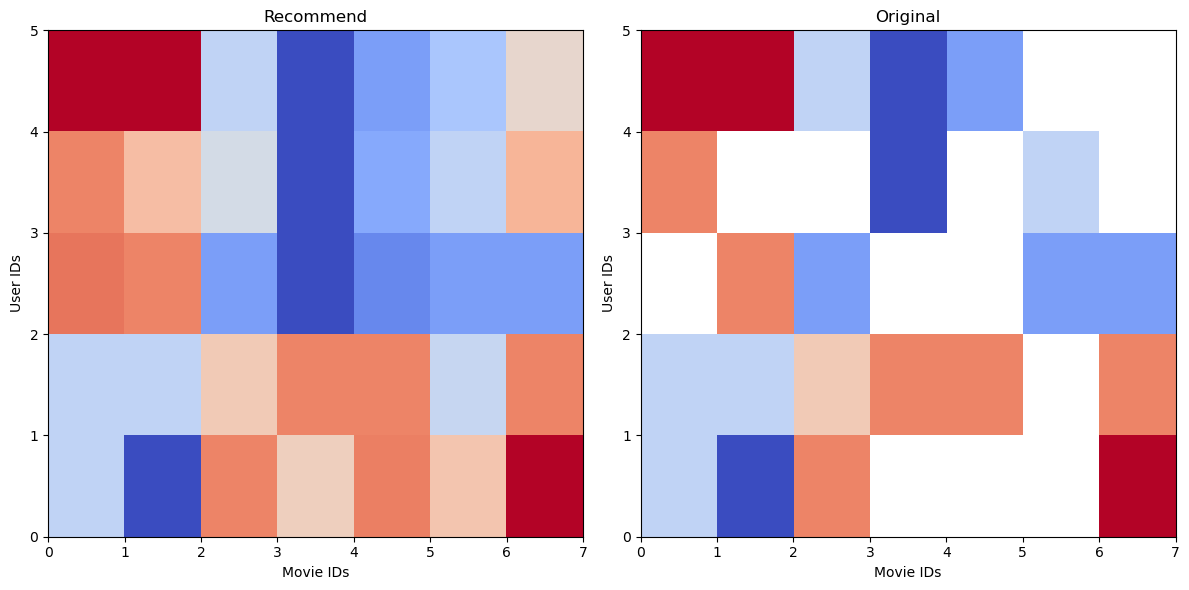

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

visualized_array = PredictMatrix.astype(float)
visualized_original_array = X.astype(float)

ax1.imshow(visualized_array, cmap='coolwarm', aspect='auto', extent=[0, visualized_array.shape[1], 0, visualized_array.shape[0]], vmin=0, vmax=5)
ax2.imshow(visualized_original_array, cmap='coolwarm', aspect='auto', extent=[0, visualized_original_array.shape[1], 0, visualized_original_array.shape[0]], vmin=0, vmax=5)

ax1.set_xlabel('Movie IDs')
ax1.set_ylabel('User IDs')
ax1.set_title('Recommend')

ax2.set_xlabel('Movie IDs')
ax2.set_ylabel('User IDs')
ax2.set_title('Original')

plt.tight_layout()

plt.show()